## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215


0:	learn: 0.9634969	total: 115ms	remaining: 1m 54s
1:	learn: 0.9453590	total: 117ms	remaining: 58.3s
2:	learn: 0.9254723	total: 118ms	remaining: 39.2s
3:	learn: 0.9106737	total: 119ms	remaining: 29.7s
4:	learn: 0.8956714	total: 121ms	remaining: 24s
5:	learn: 0.8790963	total: 122ms	remaining: 20.2s
6:	learn: 0.8645549	total: 124ms	remaining: 17.6s
7:	learn: 0.8498813	total: 125ms	remaining: 15.5s
8:	learn: 0.8349446	total: 126ms	remaining: 13.8s
9:	learn: 0.8193324	total: 127ms	remaining: 12.6s
10:	learn: 0.8043059	total: 128ms	remaining: 11.5s
11:	learn: 0.7902990	total: 130ms	remaining: 10.7s
12:	learn: 0.7757679	total: 131ms	remaining: 9.93s
13:	learn: 0.7617237	total: 132ms	remaining: 9.3s
14:	learn: 0.7499827	total: 133ms	remaining: 8.73s
15:	learn: 0.7363725	total: 133ms	remaining: 8.21s
16:	learn: 0.7252721	total: 134ms	remaining: 7.75s
17:	learn: 0.7140333	total: 135ms	remaining: 7.35s
18:	learn: 0.7015246	total: 135ms	remaining: 6.98s
19:	learn: 0.6903100	total: 136ms	remaining

49:	learn: 0.4601491	total: 216ms	remaining: 4.11s
50:	learn: 0.4555060	total: 218ms	remaining: 4.05s
51:	learn: 0.4513561	total: 219ms	remaining: 4s
52:	learn: 0.4459267	total: 220ms	remaining: 3.93s
53:	learn: 0.4427063	total: 221ms	remaining: 3.87s
54:	learn: 0.4383482	total: 222ms	remaining: 3.81s
55:	learn: 0.4348017	total: 222ms	remaining: 3.75s
56:	learn: 0.4302404	total: 223ms	remaining: 3.69s
57:	learn: 0.4262390	total: 224ms	remaining: 3.63s
58:	learn: 0.4228225	total: 225ms	remaining: 3.58s
59:	learn: 0.4188142	total: 225ms	remaining: 3.53s
60:	learn: 0.4146418	total: 226ms	remaining: 3.48s
61:	learn: 0.4112177	total: 227ms	remaining: 3.43s
62:	learn: 0.4084620	total: 227ms	remaining: 3.38s
63:	learn: 0.4048257	total: 228ms	remaining: 3.33s
64:	learn: 0.4014993	total: 229ms	remaining: 3.29s
65:	learn: 0.3976617	total: 229ms	remaining: 3.25s
66:	learn: 0.3941431	total: 230ms	remaining: 3.2s
67:	learn: 0.3908904	total: 231ms	remaining: 3.16s
68:	learn: 0.3880707	total: 232ms	r

148:	learn: 0.2570046	total: 308ms	remaining: 1.76s
149:	learn: 0.2564349	total: 309ms	remaining: 1.75s
150:	learn: 0.2553020	total: 309ms	remaining: 1.74s
151:	learn: 0.2545803	total: 310ms	remaining: 1.73s
152:	learn: 0.2538975	total: 312ms	remaining: 1.72s
153:	learn: 0.2532864	total: 313ms	remaining: 1.72s
154:	learn: 0.2523321	total: 314ms	remaining: 1.71s
155:	learn: 0.2514234	total: 314ms	remaining: 1.7s
156:	learn: 0.2506607	total: 316ms	remaining: 1.7s
157:	learn: 0.2498061	total: 317ms	remaining: 1.69s
158:	learn: 0.2490171	total: 319ms	remaining: 1.68s
159:	learn: 0.2482424	total: 319ms	remaining: 1.68s
160:	learn: 0.2476469	total: 320ms	remaining: 1.67s
161:	learn: 0.2468541	total: 321ms	remaining: 1.66s
162:	learn: 0.2463866	total: 322ms	remaining: 1.65s
163:	learn: 0.2455086	total: 323ms	remaining: 1.65s
164:	learn: 0.2448314	total: 325ms	remaining: 1.64s
165:	learn: 0.2441217	total: 325ms	remaining: 1.63s
166:	learn: 0.2434403	total: 326ms	remaining: 1.63s
167:	learn: 0.

260:	learn: 0.1911454	total: 407ms	remaining: 1.15s
261:	learn: 0.1907303	total: 408ms	remaining: 1.15s
262:	learn: 0.1902405	total: 409ms	remaining: 1.15s
263:	learn: 0.1898314	total: 410ms	remaining: 1.14s
264:	learn: 0.1894009	total: 410ms	remaining: 1.14s
265:	learn: 0.1890732	total: 411ms	remaining: 1.13s
266:	learn: 0.1887084	total: 412ms	remaining: 1.13s
267:	learn: 0.1883582	total: 413ms	remaining: 1.13s
268:	learn: 0.1879612	total: 414ms	remaining: 1.12s
269:	learn: 0.1874613	total: 414ms	remaining: 1.12s
270:	learn: 0.1867690	total: 415ms	remaining: 1.12s
271:	learn: 0.1863469	total: 416ms	remaining: 1.11s
272:	learn: 0.1859709	total: 417ms	remaining: 1.11s
273:	learn: 0.1854857	total: 418ms	remaining: 1.11s
274:	learn: 0.1851672	total: 418ms	remaining: 1.1s
275:	learn: 0.1847888	total: 419ms	remaining: 1.1s
276:	learn: 0.1843572	total: 420ms	remaining: 1.1s
277:	learn: 0.1840011	total: 421ms	remaining: 1.09s
278:	learn: 0.1837256	total: 422ms	remaining: 1.09s
279:	learn: 0.1

364:	learn: 0.1543151	total: 500ms	remaining: 870ms
365:	learn: 0.1542806	total: 501ms	remaining: 867ms
366:	learn: 0.1541517	total: 501ms	remaining: 865ms
367:	learn: 0.1538971	total: 502ms	remaining: 863ms
368:	learn: 0.1536353	total: 503ms	remaining: 860ms
369:	learn: 0.1533089	total: 504ms	remaining: 858ms
370:	learn: 0.1529135	total: 505ms	remaining: 856ms
371:	learn: 0.1525971	total: 505ms	remaining: 853ms
372:	learn: 0.1522724	total: 506ms	remaining: 851ms
373:	learn: 0.1518716	total: 507ms	remaining: 849ms
374:	learn: 0.1515787	total: 508ms	remaining: 847ms
375:	learn: 0.1512378	total: 509ms	remaining: 844ms
376:	learn: 0.1508323	total: 509ms	remaining: 842ms
377:	learn: 0.1507614	total: 510ms	remaining: 840ms
378:	learn: 0.1505732	total: 511ms	remaining: 837ms
379:	learn: 0.1501792	total: 512ms	remaining: 835ms
380:	learn: 0.1498027	total: 513ms	remaining: 833ms
381:	learn: 0.1493305	total: 513ms	remaining: 831ms
382:	learn: 0.1492221	total: 514ms	remaining: 828ms
383:	learn: 

476:	learn: 0.1271972	total: 597ms	remaining: 655ms
477:	learn: 0.1270149	total: 598ms	remaining: 653ms
478:	learn: 0.1267982	total: 599ms	remaining: 652ms
479:	learn: 0.1266335	total: 600ms	remaining: 650ms
480:	learn: 0.1263812	total: 601ms	remaining: 648ms
481:	learn: 0.1261741	total: 602ms	remaining: 647ms
482:	learn: 0.1260272	total: 603ms	remaining: 645ms
483:	learn: 0.1259206	total: 603ms	remaining: 643ms
484:	learn: 0.1258283	total: 604ms	remaining: 641ms
485:	learn: 0.1256982	total: 605ms	remaining: 640ms
486:	learn: 0.1254812	total: 606ms	remaining: 638ms
487:	learn: 0.1252513	total: 607ms	remaining: 636ms
488:	learn: 0.1250444	total: 608ms	remaining: 635ms
489:	learn: 0.1248150	total: 608ms	remaining: 633ms
490:	learn: 0.1246612	total: 609ms	remaining: 632ms
491:	learn: 0.1244097	total: 610ms	remaining: 630ms
492:	learn: 0.1241802	total: 611ms	remaining: 629ms
493:	learn: 0.1240165	total: 612ms	remaining: 627ms
494:	learn: 0.1237382	total: 613ms	remaining: 626ms
495:	learn: 

556:	learn: 0.1121437	total: 700ms	remaining: 557ms
557:	learn: 0.1119376	total: 701ms	remaining: 555ms
558:	learn: 0.1116742	total: 702ms	remaining: 554ms
559:	learn: 0.1115274	total: 703ms	remaining: 553ms
560:	learn: 0.1113401	total: 704ms	remaining: 551ms
561:	learn: 0.1111890	total: 705ms	remaining: 550ms
562:	learn: 0.1111390	total: 706ms	remaining: 548ms
563:	learn: 0.1109329	total: 707ms	remaining: 547ms
564:	learn: 0.1108069	total: 708ms	remaining: 545ms
565:	learn: 0.1106254	total: 709ms	remaining: 543ms
566:	learn: 0.1104684	total: 710ms	remaining: 542ms
567:	learn: 0.1103126	total: 710ms	remaining: 540ms
568:	learn: 0.1100538	total: 712ms	remaining: 539ms
569:	learn: 0.1099320	total: 716ms	remaining: 540ms
570:	learn: 0.1097711	total: 717ms	remaining: 539ms
571:	learn: 0.1096615	total: 718ms	remaining: 538ms
572:	learn: 0.1094103	total: 720ms	remaining: 536ms
573:	learn: 0.1090383	total: 721ms	remaining: 535ms
574:	learn: 0.1088632	total: 722ms	remaining: 534ms
575:	learn: 

637:	learn: 0.0990788	total: 788ms	remaining: 447ms
638:	learn: 0.0989607	total: 789ms	remaining: 446ms
639:	learn: 0.0988430	total: 791ms	remaining: 445ms
640:	learn: 0.0987217	total: 791ms	remaining: 443ms
641:	learn: 0.0986837	total: 792ms	remaining: 442ms
642:	learn: 0.0985570	total: 793ms	remaining: 440ms
643:	learn: 0.0983809	total: 794ms	remaining: 439ms
644:	learn: 0.0982551	total: 795ms	remaining: 438ms
645:	learn: 0.0981979	total: 796ms	remaining: 436ms
646:	learn: 0.0981835	total: 797ms	remaining: 435ms
647:	learn: 0.0980433	total: 797ms	remaining: 433ms
648:	learn: 0.0978884	total: 798ms	remaining: 432ms
649:	learn: 0.0976336	total: 799ms	remaining: 430ms
650:	learn: 0.0975260	total: 800ms	remaining: 429ms
651:	learn: 0.0974242	total: 800ms	remaining: 427ms
652:	learn: 0.0974102	total: 801ms	remaining: 426ms
653:	learn: 0.0972586	total: 802ms	remaining: 424ms
654:	learn: 0.0970903	total: 803ms	remaining: 423ms
655:	learn: 0.0969226	total: 804ms	remaining: 421ms
656:	learn: 

749:	learn: 0.0850200	total: 890ms	remaining: 297ms
750:	learn: 0.0849559	total: 891ms	remaining: 295ms
751:	learn: 0.0848490	total: 892ms	remaining: 294ms
752:	learn: 0.0847117	total: 894ms	remaining: 293ms
753:	learn: 0.0846025	total: 895ms	remaining: 292ms
754:	learn: 0.0845027	total: 895ms	remaining: 291ms
755:	learn: 0.0844075	total: 897ms	remaining: 289ms
756:	learn: 0.0843197	total: 898ms	remaining: 288ms
757:	learn: 0.0841373	total: 899ms	remaining: 287ms
758:	learn: 0.0840087	total: 900ms	remaining: 286ms
759:	learn: 0.0838442	total: 902ms	remaining: 285ms
760:	learn: 0.0837741	total: 903ms	remaining: 284ms
761:	learn: 0.0836512	total: 904ms	remaining: 282ms
762:	learn: 0.0835394	total: 905ms	remaining: 281ms
763:	learn: 0.0833605	total: 906ms	remaining: 280ms
764:	learn: 0.0832355	total: 907ms	remaining: 279ms
765:	learn: 0.0831552	total: 908ms	remaining: 277ms
766:	learn: 0.0831356	total: 909ms	remaining: 276ms
767:	learn: 0.0830317	total: 910ms	remaining: 275ms
768:	learn: 

821:	learn: 0.0773792	total: 981ms	remaining: 212ms
822:	learn: 0.0772794	total: 982ms	remaining: 211ms
823:	learn: 0.0771597	total: 984ms	remaining: 210ms
824:	learn: 0.0770929	total: 985ms	remaining: 209ms
825:	learn: 0.0769988	total: 986ms	remaining: 208ms
826:	learn: 0.0769676	total: 986ms	remaining: 206ms
827:	learn: 0.0768988	total: 988ms	remaining: 205ms
828:	learn: 0.0768786	total: 988ms	remaining: 204ms
829:	learn: 0.0767774	total: 989ms	remaining: 203ms
830:	learn: 0.0767645	total: 990ms	remaining: 201ms
831:	learn: 0.0765849	total: 991ms	remaining: 200ms
832:	learn: 0.0765732	total: 992ms	remaining: 199ms
833:	learn: 0.0765112	total: 993ms	remaining: 198ms
834:	learn: 0.0764638	total: 994ms	remaining: 196ms
835:	learn: 0.0764060	total: 995ms	remaining: 195ms
836:	learn: 0.0762760	total: 997ms	remaining: 194ms
837:	learn: 0.0761212	total: 999ms	remaining: 193ms
838:	learn: 0.0760129	total: 1000ms	remaining: 192ms
839:	learn: 0.0759530	total: 1s	remaining: 191ms
840:	learn: 0.

933:	learn: 0.0671976	total: 1.08s	remaining: 76.6ms
934:	learn: 0.0671907	total: 1.08s	remaining: 75.5ms
935:	learn: 0.0670515	total: 1.09s	remaining: 74.3ms
936:	learn: 0.0669789	total: 1.09s	remaining: 73.1ms
937:	learn: 0.0668459	total: 1.09s	remaining: 71.9ms
938:	learn: 0.0667064	total: 1.09s	remaining: 70.7ms
939:	learn: 0.0666347	total: 1.09s	remaining: 69.5ms
940:	learn: 0.0664825	total: 1.09s	remaining: 68.4ms
941:	learn: 0.0664006	total: 1.09s	remaining: 67.2ms
942:	learn: 0.0663222	total: 1.09s	remaining: 66ms
943:	learn: 0.0661484	total: 1.09s	remaining: 64.8ms
944:	learn: 0.0660830	total: 1.09s	remaining: 63.6ms
945:	learn: 0.0660325	total: 1.09s	remaining: 62.5ms
946:	learn: 0.0659597	total: 1.09s	remaining: 61.3ms
947:	learn: 0.0657707	total: 1.09s	remaining: 60.1ms
948:	learn: 0.0656736	total: 1.1s	remaining: 59ms
949:	learn: 0.0654957	total: 1.1s	remaining: 57.8ms
950:	learn: 0.0654632	total: 1.1s	remaining: 56.6ms
951:	learn: 0.0653784	total: 1.1s	remaining: 55.4ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

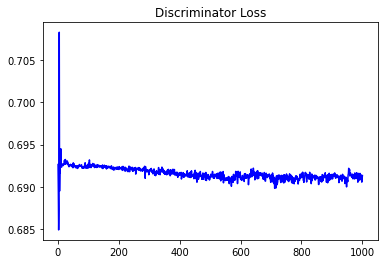

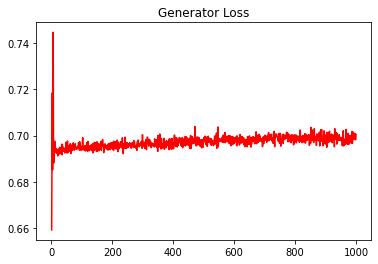

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08545966470165509


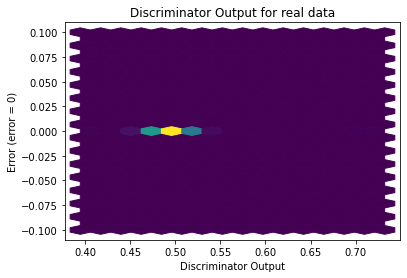

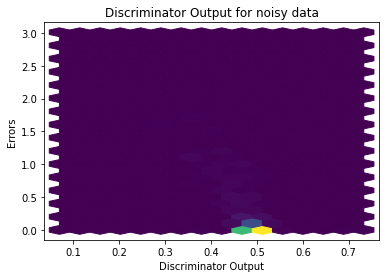

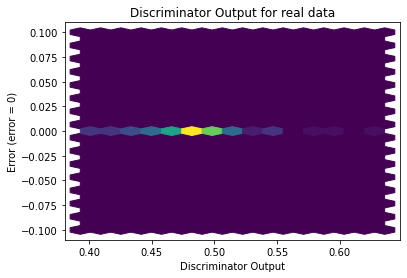

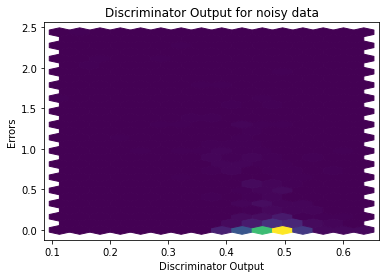

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


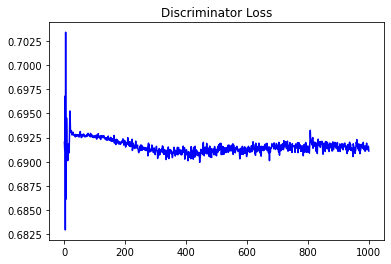

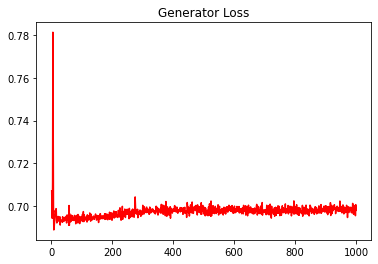

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07326008206000595


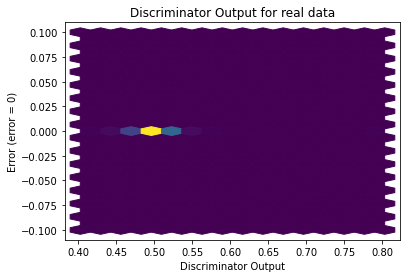

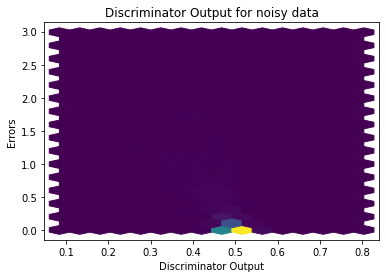

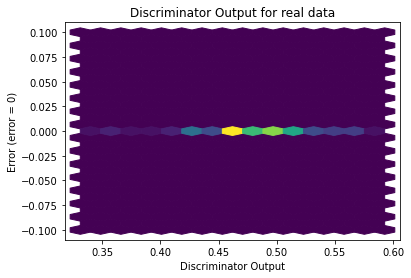

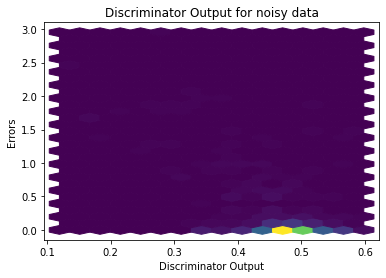

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9862]], requires_grad=True)
